In [35]:
global_time = datetime.datetime.now()
!which python

/Users/karthikmaddukuri/anaconda3/envs/iris/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [45]:
import datetime
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# Load Data

In [4]:
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(data['data'][:5], end='\n\n')
print(data['feature_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


 _The goal is to predict the species of the flower or classify the species into setosa, versicolor, or virginica using the 4 attributes._
 
**This is a  Multiclass classification problem**

## Load data into a DataFrame

In [7]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [8]:
df['target'] = data['target']

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Plotting the distribution of features

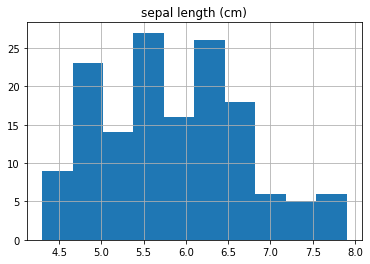

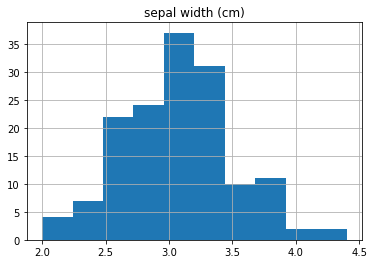

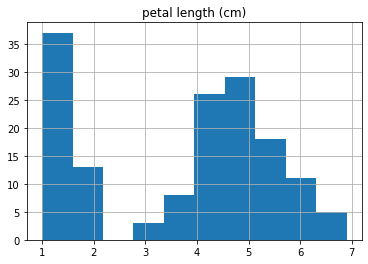

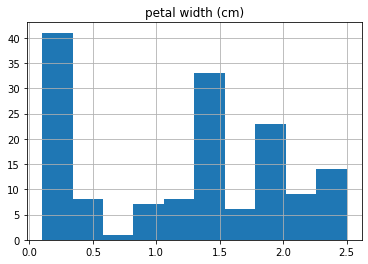

In [12]:
columns = df.columns[:4]
for col in columns:
    df[col].hist(bins=10)
    plt.title(col)
    plt.show()

#### Plotting a Univariate Relational Plot between the features and the target

In [13]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: "virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
# Saving the data to csv
df.to_csv('../data/data.csv')

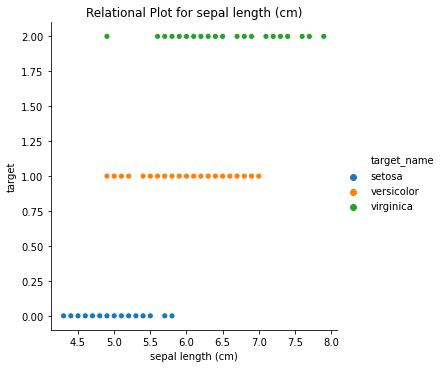

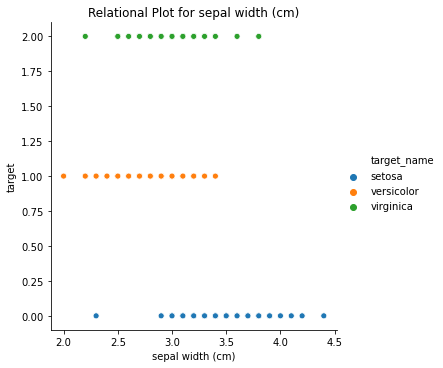

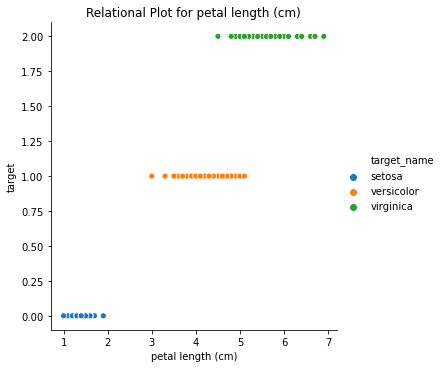

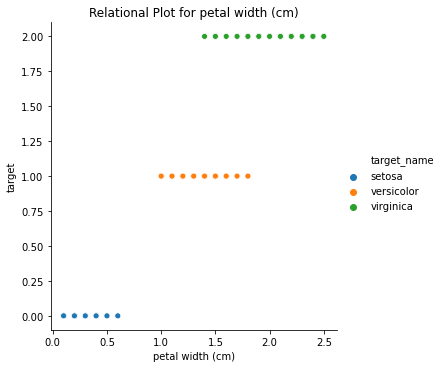

In [15]:
col_attr = df.columns[:4]
for col in col_attr:
    sns.relplot(x=f'{col}', y='target', hue='target_name', data=df)
    plt.title(f'Relational Plot for {col}', y=2)
    plt.show()

#### Pairplots

/Users/karthikmaddukuri/anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/karthikmaddukuri/anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/karthikmaddukuri/anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


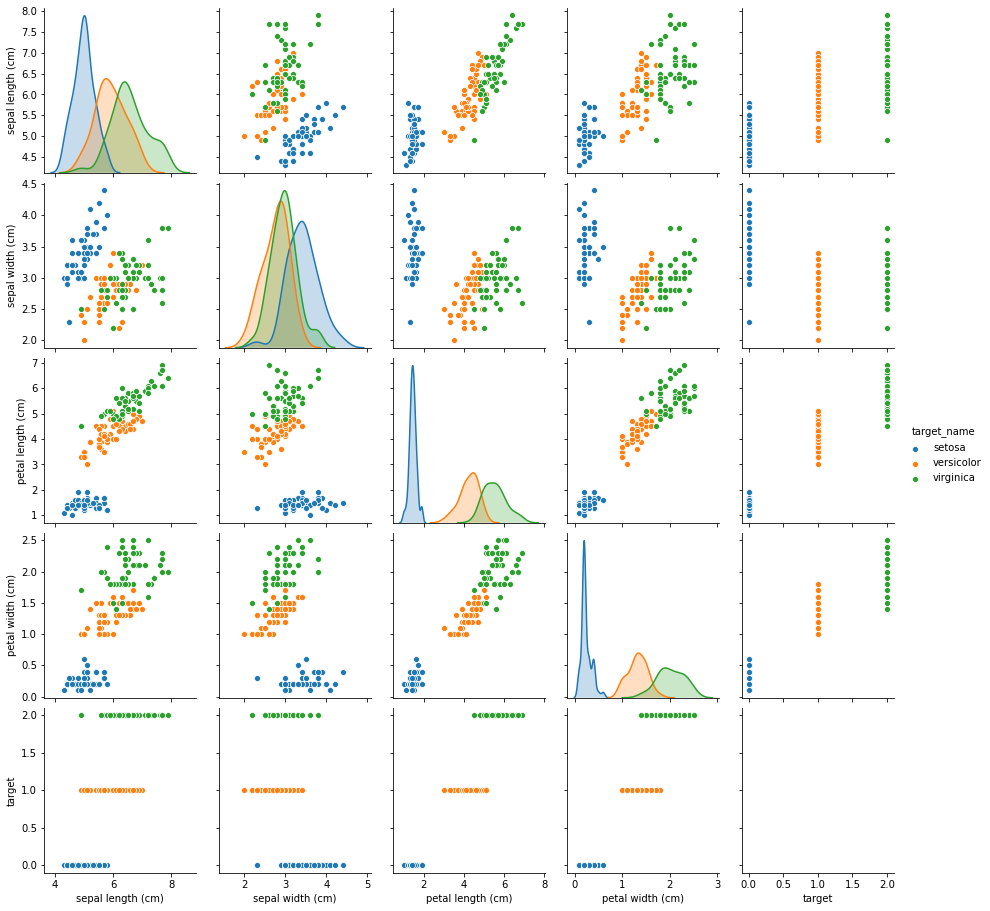

In [16]:
_ = sns.pairplot(df, hue='target_name')

In the _petal width v/s petal length_ plot and _target v/s petal length_ plot, _setosa_ has its own cluster. It is evident from the above plots that **_setosa_** is easily differentiable.

### Splitting the data into Training and Testing

In [17]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=1)

In [18]:
print(f'Training Data size is {df_train.shape}', end='\n\n')
print(f'Testing Data size is {df_test.shape}')

Training Data size is (112, 6)

Testing Data size is (38, 6)


In [19]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
54,6.5,2.8,4.6,1.5,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica
112,6.8,3.0,5.5,2.1,2,virginica
17,5.1,3.5,1.4,0.3,0,setosa
119,6.0,2.2,5.0,1.5,2,virginica


## Modeling (using Numpy arrays)

In [20]:
X_train = df_train.drop(columns=['target', 'target_name']).values
y_train = df_train['target'].values

#### Simple Manual Model

In [21]:
def single_feature_pred(petal_length):
    '''
    Predicts the species using the petal length
    '''
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    return 2

In [22]:
single_feature_pred(5)

2

In [23]:
# petal length values
X_train[:, 2]

array([4.6, 5.8, 5.5, 1.4, 5. , 5.6, 4.6, 6.9, 1.7, 1.4, 1.4, 3.9, 1.5,
       1.3, 6.7, 5.4, 6.3, 5.6, 4.8, 4.5, 6.7, 4.2, 1.6, 5. , 4.9, 1.4,
       1.3, 5.8, 1.4, 4.9, 5.1, 4.4, 4.5, 5.7, 4.8, 1.6, 4. , 4.3, 5.5,
       3.3, 6. , 4. , 1.5, 1.5, 1.5, 5.7, 1.3, 5.1, 5.3, 5.1, 1.5, 1.7,
       4.1, 1.5, 6.1, 4.3, 6.6, 5.2, 4.4, 5.4, 6.1, 3.6, 1.5, 3.9, 1.3,
       3.8, 4.9, 1.6, 4.8, 1.6, 1.9, 5.6, 4.9, 5.9, 1.4, 1.5, 4.8, 1.5,
       5.1, 1.6, 5.2, 4.5, 1.4, 5.3, 1.1, 4.1, 1.4, 3.7, 3.5, 1.4, 1.4,
       3.3, 1. , 4.2, 4.7, 1.5, 4.7, 4.2, 4.5, 4.7, 5.1, 1.7, 1.6, 5.6,
       4. , 5.8, 3.5, 5.1, 5.5, 4.9, 5.6, 1.4])

In [24]:
manual_y_pred = np.array([single_feature_pred(val) for val in X_train[:,2]])

In [25]:
manual_model_accuracy = np.mean(manual_y_pred == y_train)
print(f'The manual model accuracy is {manual_model_accuracy :.2f}')

The manual model accuracy is 0.95


#### Logistic Regression

In [26]:
model = LogisticRegression()

#### _Splitting into training and validation data. Although the size is very small, this is for better evaluation._

In [27]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.25)

In [28]:
model.fit(X_t, y_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = model.predict(X_v)

In [30]:
y_pred

array([2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0,
       1, 2, 2, 0, 2, 2])

In [44]:
# Accuracy
# np.mean(y_pred == y_v)
model.score(X_v, y_v)

0.9642857142857143

In [39]:
print(classification_report(y_v, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



#### Evaluate the model

In [56]:
model = LogisticRegression(max_iter=150)

In [61]:
np.mean(cross_val_score(model, X_train, y_train, cv=5))

0.9644268774703558

In [62]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [63]:
correct_predictions = y_pred == y_train

In [64]:
incorrect_predictions = ~correct_predictions

In [65]:
X_train[incorrect_predictions]

array([[6. , 2.2, 5. , 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7]])

In [66]:
df_pred = df_train.copy()

In [67]:
df_pred['correct_predictions'] = correct_predictions

In [70]:
df_pred['prediction'] = y_pred

In [72]:
df_pred['prediction_label'] = df_pred['prediction'].map({0: 'setosa', 1: 'versicolor', 2: "virginica"})

In [88]:
df_pred.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,prediction,prediction_label
54,6.5,2.8,4.6,1.5,1,versicolor,True,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica,True,2,virginica
112,6.8,3.0,5.5,2.1,2,virginica,True,2,virginica
17,5.1,3.5,1.4,0.3,0,setosa,True,0,setosa
119,6.0,2.2,5.0,1.5,2,virginica,False,1,versicolor


In [89]:
# These are the wrongly predicted values
df_pred.loc[(df_pred['correct_predictions']==False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,prediction,prediction_label
119,6.0,2.2,5.0,1.5,2,virginica,False,1,versicolor
83,6.0,2.7,5.1,1.6,1,versicolor,False,2,virginica
70,5.9,3.2,4.8,1.8,1,versicolor,False,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica,False,1,versicolor


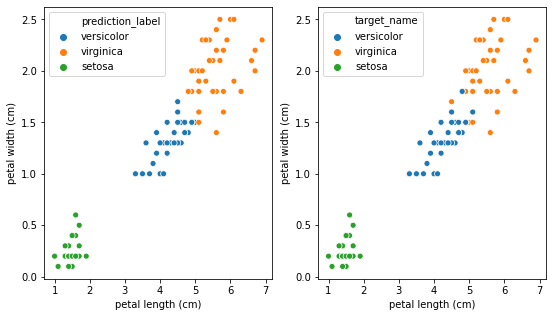

In [137]:
f, ax = plt.subplots(1, 2, figsize=(9,5))
sns.scatterplot('petal length (cm)', 'petal width (cm)', data=df_pred, hue='prediction_label', ax=ax[0])
sns.scatterplot('petal length (cm)', 'petal width (cm)', data=df_pred, hue='target_name', ax=ax[1])
plt.show()

In [140]:
def plot_incorrect_preds(df_pred, x_axis, y_axis):
    f, ax = plt.subplots(2, 2, figsize=(9,10))
    ax = ax.flatten()
    sns.scatterplot(x_axis,y_axis, data=df_pred, hue='prediction_label', ax=ax[0])
    sns.scatterplot(x_axis,y_axis, data=df_pred, hue='target_name', ax=ax[1])
    sns.scatterplot(x_axis,y_axis, data=df_pred, hue='correct_predictions', ax=ax[2])
    plt.show()

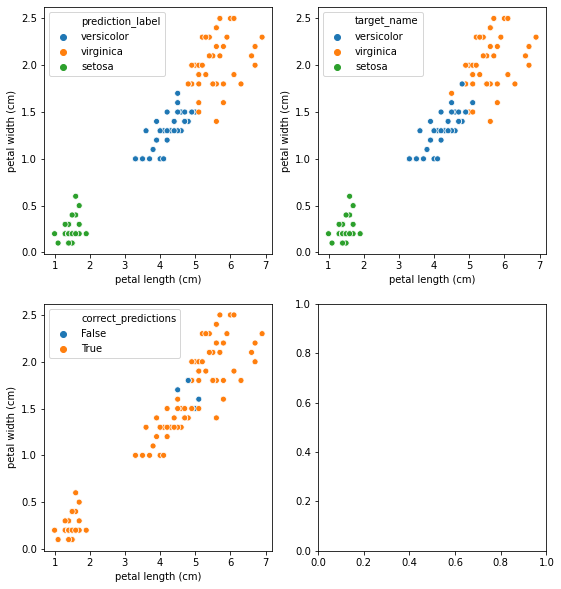

In [141]:
plot_incorrect_preds(df_pred,'petal length (cm)', 'petal width (cm)')